In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import sklearn
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn import ensemble # for random forest


# Hyper-parameter tuning
from sklearn.model_selection import GridSearchCV

# Examining feature importance
from sklearn.inspection import permutation_importance
import shap


%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', None)

## Function Definition

In [134]:
# Define some function for evaluation and feature importance

def evaluate(model, test_features, test_labels, train_features, train_labels):
    r2_test = model.score(test_features, test_labels)
    r2_train = model.score(train_features, train_labels)
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    error_percent_sale_price = (predictions - test_labels) / test_labels
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Test Error: {:0.4f} $USD'.format(np.mean(errors)))
    print('Test Accuracy = {:0.2f}%'.format(accuracy))
    print('R-squared train = {:0.2f}%'.format(r2_train))
    print('R-squared test = {:0.2f}%'.format(r2_test))
    return (accuracy, r2_train, r2_test, error_percent_sale_price)

# Built in Gini Importance: the mean decrease in impurity (features selected based on variance reduction)
# But has tendency to prefer numerical features and categorical features with high cardinality
# Not robust to correlated features

def get_importance(model, x_test, y_test):
    # Get numerical feature importances
    importances = list(model.feature_importances_)
    # List of tuples with variable and importance
    feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(features, importances)]
    # Sort the feature importances by most important first
    feature_importances_sort = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Print out the feature and importances 
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_sort if pair[1] > 0.001];
    
    # Plot Gini Importance
    feature_importances = sorted(feature_importances, key = lambda x: x[1])

    featureNames, featureScores = zip(*list(feature_importances))
    plt.barh(range(len(featureScores[-20:])), featureScores[-20:], tick_label=featureNames[-20:])
    plt.xlabel("Gini Feature Importance")

    
    return feature_importances_sort

In [1]:
# Import Cleaned and One-hot-encoded Data 

data = pd.read('../../Austin/ames_house_price_no_dummies.csv')

NameError: name 'pd' is not defined

In [102]:
data.head()

,pid,gr_liv_area,sale_price,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmt_fin_type1,bsmt_fin_sf1,bsmt_fin_type2,bsmt_fin_sf2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abv_gr,kitchen_abv_gr,kitchen_qual,tot_rms_abv_grd,functional,fireplaces,fireplace_qu,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3_ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,bc_sale_price,street_grvl,alley_grvl,alley_pave,land_contour_bnk,land_contour_hls,land_contour_low,lot_config_corner,lot_config_culdsac,lot_config_fr2,lot_config_fr3,neighborhood_blmngtn,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_grnhill,neighborhood_idotrr,neighborhood_landmrk,neighborhood_meadowv,neighborhood_mitchel,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker,near_rr,near_main_rd,near_pos,bldg_type_2fmcon,bldg_type_duplex,bldg_type_twnhs,bldg_type_twnhse,house_style_1.5fin,house_style_1.5unf,house_style_2.5fin,house_style_2.5unf,house_style_2story,house_style_sfoyer,house_style_slvl,roof_style_flat,roof_style_gambrel,roof_style_hip,roof_style_mansard,roof_style_shed,roof_matl_membran,roof_matl_metal,roof_matl_roll,roof_matl_tar&grv,roof_matl_wdshake,roof_matl_wdshngl,exterior1st_asbshng,exterior1st_asphshn,exterior1st_brkcomm,exterior1st_brkface,exterior1st_cblock,exterior1st_cemntbd,exterior1st_hdboard,exterior1st_imstucc,exterior1st_metalsd,exterior1st_plywood,exterior1st_precast,exterior1st_stucco,exterior1st_wd sdng,exterior1st_wdshing,exterior2nd_asbshng,exterior2nd_asphshn,exterior2nd_brk cmn,exterior2nd_brkface,exterior2nd_cblock,exterior2nd_cmentbd,exterior2nd_hdboard,exterior2nd_imstucc,exterior2nd_metalsd,exterior2nd_plywood,exterior2nd_precast,exterior2nd_stone,exterior2nd_stucco,exterior2nd_wd sdng,exterior2nd_wd shng,mas_vnr_type_brkcmn,mas_vnr_type_brkface,mas_vnr_type_stone,foundation_brktil,foundation_pconc,foundation_slab,foundation_stone,foundation_wood,heating_floor,heating_gasw,heating_grav,heating_othw,heating_wall,garage_type_2types,garage_type_basment,garage_type_builtin,garage_type_carport,garage_type_detchd,garage_type_na,misc_feature_gar2,misc_feature_othr,misc_feature_shed,misc_feature_tenc,sale_type_cod,sale_type_cwd,sale_type_con,sale_type_conld,sale_type_conli,sale_type_conlw,sale_type_new,sale_type_oth,sale_type_vwd,sale_condition_abnorml,sale_condition_adjland,sale_condition_alloca,sale_condition_family,sale_condition_partial,ms_sub_class_120,ms_sub_class_150,ms_sub_class_160,ms_sub_class_180,ms_sub_class_190,ms_sub_class_30,ms_sub_class_40,ms_sub_class_45,ms_sub_class_50,ms_sub_class_60,ms_sub_class_70,ms_sub_class_75,ms_sub_class_80,ms_sub_class_85,ms_sub_class_90,ms_zoning_a (agr),ms_zoning_c (all),ms_zoning_fv,ms_zoning_i (all),ms_zoning_rh,ms_zoning_rm,house_age_at_sale,construction_age_at_sale,yr_sold_2007,yr_sold_2008,yr_sold_2009,yr_sold_2010
0,909176150,856,126000,80.0,7890,4,2,3,6,6,0.0,3,3,3,3,1,3,238.0,1,0.0,618.0,856.0,3,1,4,856,0,0,1.0,0.0,1,0,2,1,3,4,7,1,4,1,2.0,399.0,3,3,3,0,0,0,0,166,0,0,0,0,3,10.299527,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71,60,0,0,0,1
1,905476230,1049,139500,42.0,4235,4,2,3,5,5,149.0,4,3,4,3,2,6,552.0,5,3

In [103]:
features = data.drop(['pid', 'sale_price', 'bc_sale_price'], axis = 1)
target = data.iloc[:,2]


In [104]:
# Train / test / split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# RANDOM FOREST MODELS - Base Model

In [85]:
# Instantiate model with 500 decision trees, out of box scoring and bootstrapping
rf = ensemble.RandomForestRegressor(n_estimators = 475, random_state = 42, oob_score=True, bootstrap = True)

# Fit simple default value model
# Train the model on training data
rf.fit(X_train, y_train);



Model Performance
Average Test Error: 15475.8494 $USD
Test Accuracy = 91.18%
R-squared train = 0.98%
R-squared test = 0.90%
Variable: overall_qual         Importance: 0.5256
Variable: gr_liv_area          Importance: 0.148
Variable: 1st_flr_sf           Importance: 0.063
Variable: garage_area          Importance: 0.0376
Variable: total_bsmt_sf        Importance: 0.0331
Variable: mas_vnr_area         Importance: 0.0175
Variable: bsmt_fin_sf1         Importance: 0.0173
Variable: lot_area             Importance: 0.0133
Variable: house_age_at_sale    Importance: 0.0121
Variable: full_bath            Importance: 0.0117
Variable: 2nd_flr_sf           Importance: 0.0082
Variable: bsmt_qual            Importance: 0.0075
Variable: construction_age_at_sale Importance: 0.0067
Variable: bsmt_fin_type1       Importance: 0.0056
Variable: bsmt_unf_sf          Importance: 0.0053
Variable: garage_finish        Importance: 0.0049
Variable: lot_frontage         Importance: 0.0048
Variable: mo_sold       

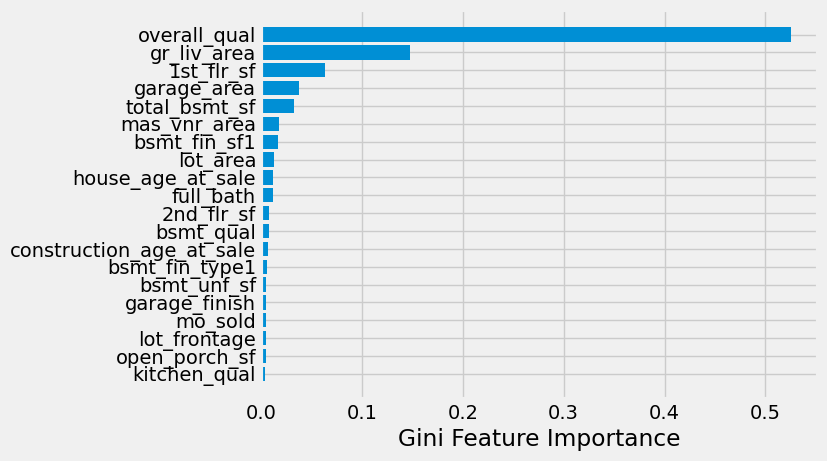

In [86]:
# Evaluation
eval_base = evaluate(rf, X_test, y_test, X_train, y_train)

feat_imp_base = get_importance(rf, X_test, y_test)
# Some clear overfitting happening with the train / test R square




In [ ]:
# Permutation Importance
perm_importance = permutation_importance(rf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()


Text(0.5, 0, 'Permutation Importance')

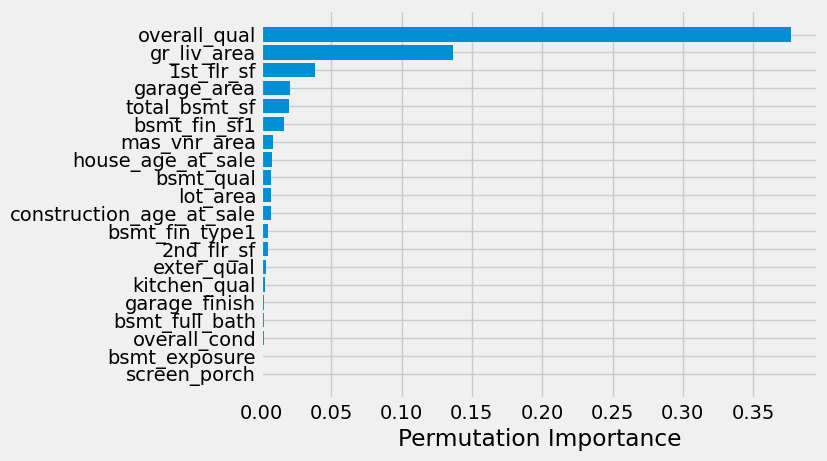

In [37]:
plt.barh(X_test.columns[sorted_idx[-20:]], perm_importance.importances_mean[sorted_idx[-20:]])
plt.xlabel("Permutation Importance")

In [39]:
# SHAP Importance
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

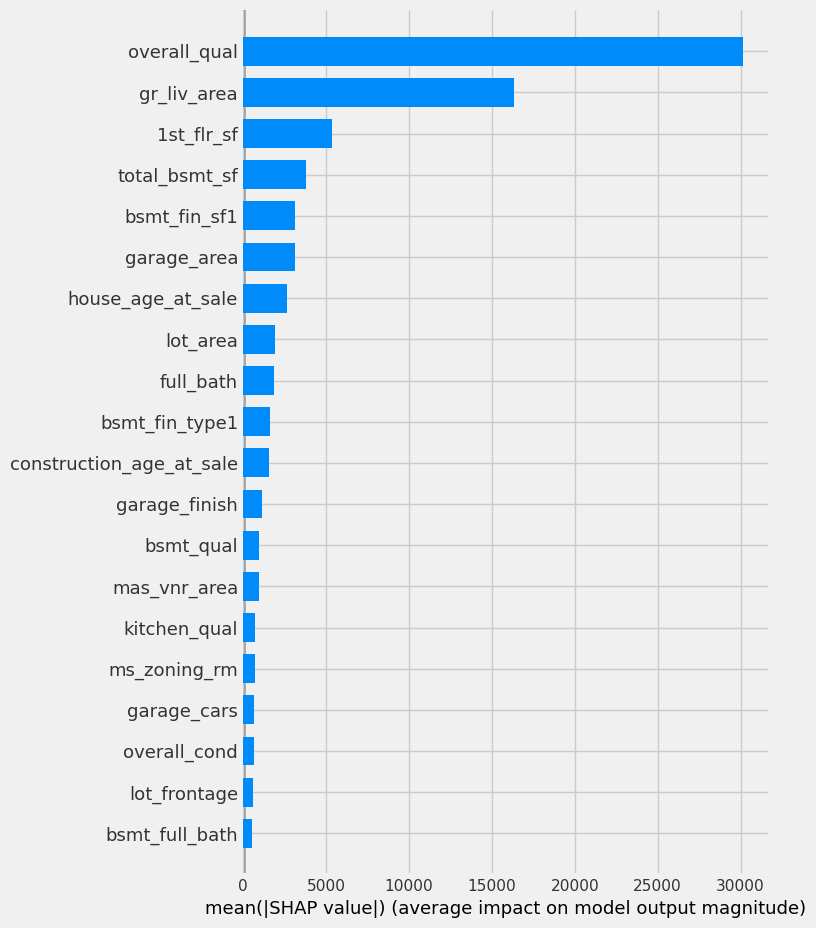

In [40]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


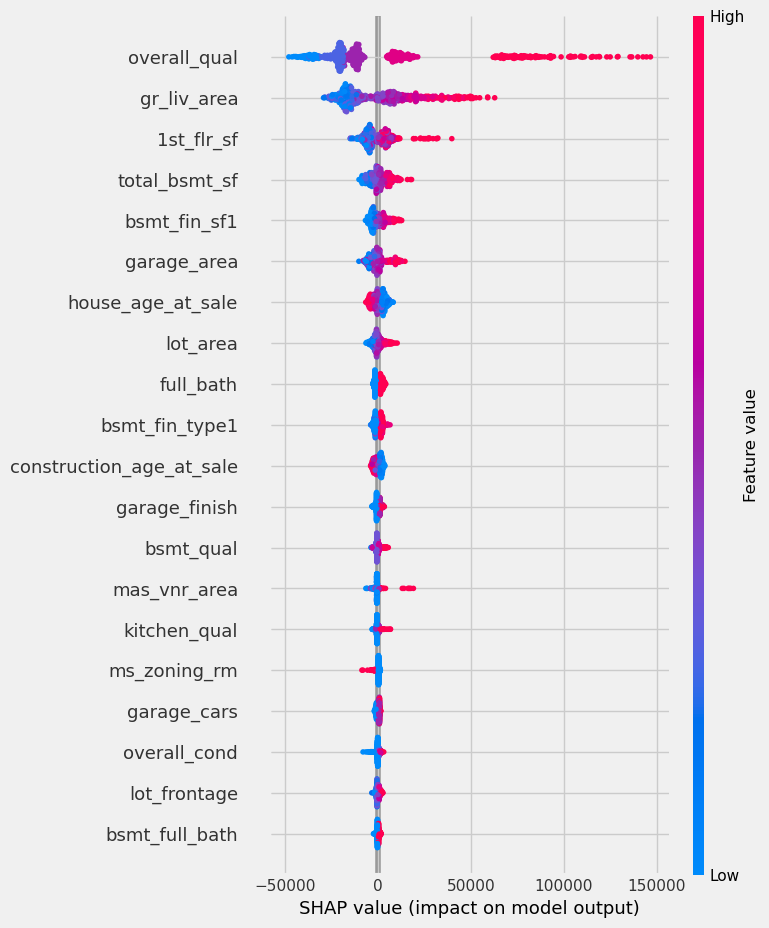

In [41]:
shap.summary_plot(shap_values, X_test)


# Manual Visualization of the Effect of Hyper-parameters on Base-line Model


## Tree Structure Restricting Parameters (to prevent overfitting)
 - max_depth
 - min_samples_split / min_samples_leaf (both control the numer of samples a node must have before splitting or after splitting)
 - max_leaf_nodes (maximum number of leaf nodes a tree can have)
 
 ### Bootstrap Hyper-parameters
 - max_features (max features taken into consideration for splitting each node)
 - max_samples (the number of samples to draw to train each base estimator)
 


 ### Tree Depth (max_depth)

Text(0.5, 0, 'Tree Depth')

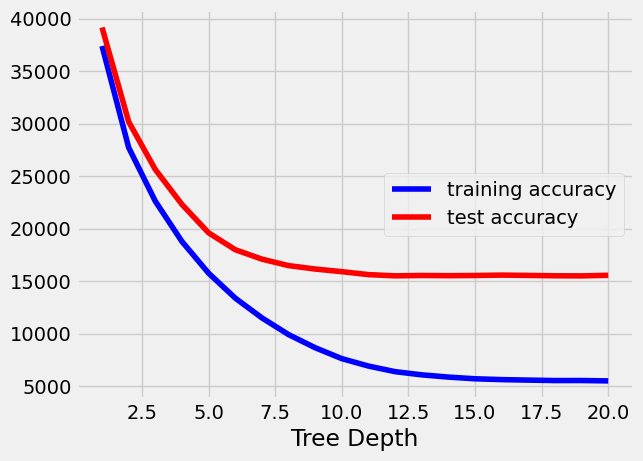

In [137]:
# manual gridsearch to plot the results
def get_error(X_train, y_train, X_test, y_test, model, show = True):
    model.fit(X_train, y_train)
    
    # TEST
    predictions = model.predict(X_test)
    errors_test = abs(predictions - y_test)
    mae_test = np.mean(errors_test)
    mape = 100 * np.mean(errors_test / y_test)
    test_accuracy = 100 - mape
    
    # TRAIN
    predictions = model.predict(X_train)
    errors_train = abs(predictions - y_train)
    mae_train = np.mean(errors_train)
    mape = 100 * np.mean(errors_train / y_train)
    train_accuracy = 100 - mape
    if show:
        print("The training error is: %.5f" %train_accuracy)
        print("The test     accuracy is: %.5f" %test_accuracy)
    return [train_accuracy, test_accuracy, mae_train, mae_test]


# Max Depth of Tree
rf = ensemble.RandomForestRegressor(n_estimators = 475, oob_score=True, bootstrap = True)
tree_train = []
tree_test = []
param_range = range(1,21,1)
for i in param_range:
    rf.set_params(max_depth = i)
    error = get_error(X_train, y_train, X_test, y_test, rf, show=False)
    tree_train.append(error[2])
    tree_test.append(error[3])
plt.plot(param_range, tree_train, c = 'blue', label='training accuracy')
plt.plot(param_range, tree_test, c = 'red', label='test accuracy')
plt.legend(loc=7)
plt.xlabel('Tree Depth')


# Likely want to limit the tree depth to 5-10 to keep the training dataset from overfitting

## Max Features

Text(0.5, 0, 'Max Features')

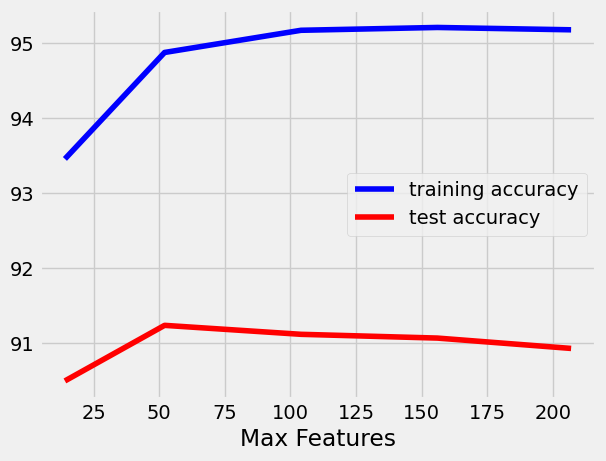

In [130]:
# Number of features to consider at every split
rf = ensemble.RandomForestRegressor(n_estimators = 475, random_state = 42, oob_score=True, bootstrap = True, max_depth = 10)
tree_train = []
tree_test = []

n_feat = len(X_train.columns)
rangeL = [np.sqrt(n_feat), 0.25*n_feat, 0.5*n_feat, 0.75*n_feat, n_feat-1]
param_range = [int(np.round(num)) for num in rangeL] # auto is just n_features

for i in param_range:
    rf.set_params(max_features = i)
    error = get_error(X_train, y_train, X_test, y_test, rf, show=False)
    tree_train.append(error[0])
    tree_test.append(error[1])
plt.plot(param_range, tree_train, c = 'blue', label='training accuracy')
plt.plot(param_range, tree_test, c = 'red', label='test accuracy')
plt.legend(loc=7)
plt.xlabel('Max Features')

# Looks like some optimal number of features for each split at ~ 50

## min_samples_split

Text(0.5, 0, 'Minimum Sample Split')

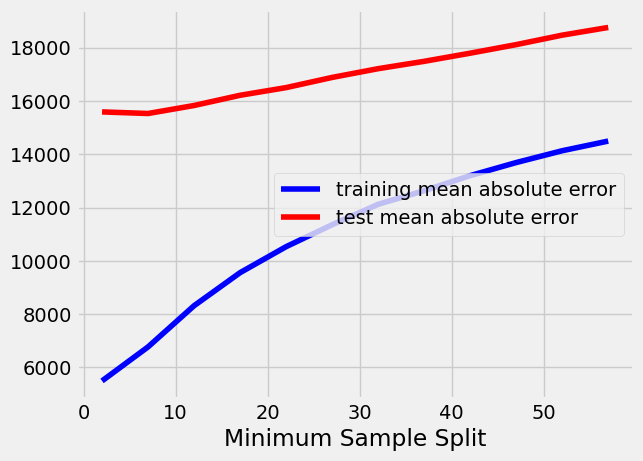

In [140]:
# Minimum number of samples for split
rf = ensemble.RandomForestRegressor(n_estimators = 475, oob_score=True, bootstrap = True)
tree_train = []
tree_test = []
param_range = range(2,60,5)
for i in param_range:
    rf.set_params(min_samples_split = i)
    error = get_error(X_train, y_train, X_test, y_test, rf, show=False)
    tree_train.append(error[2])
    tree_test.append(error[3])
plt.plot(param_range, tree_train, c = 'blue', label='training mean absolute error')
plt.plot(param_range, tree_test, c = 'red', label='test mean absolute error')
plt.legend(loc=7)
plt.xlabel('Minimum Sample Split')

# looks like we should grid search in the 4-10 range

## max_leaf_nodes

Text(0.5, 0, 'Max Leaf Nodes')

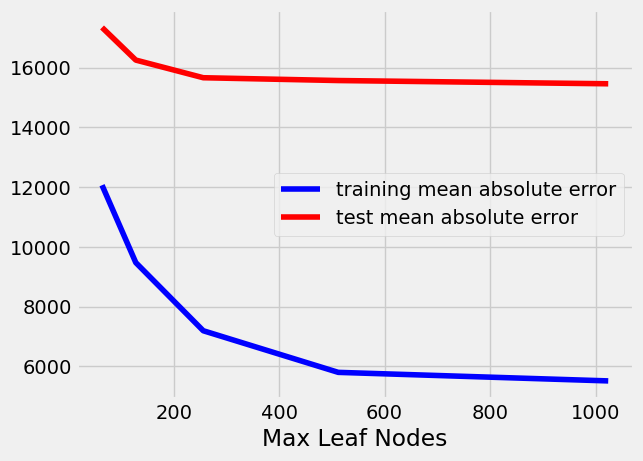

In [150]:
# Maximum number of leaf nodes for a tree
rf = ensemble.RandomForestRegressor(n_estimators = 475, oob_score=True, bootstrap = True)
tree_train = []
tree_test = []
param_range = [64,128, 256, 512, 1024]
for i in param_range:
    rf.set_params(max_leaf_nodes = i)
    error = get_error(X_train, y_train, X_test, y_test, rf, show=False)
    tree_train.append(error[2])
    tree_test.append(error[3])
plt.plot(param_range, tree_train, c = 'blue', label='training mean absolute error')
plt.plot(param_range, tree_test, c = 'red', label='test mean absolute error')
plt.legend(loc=7)
plt.xlabel('Max Leaf Nodes')

Text(0.5, 0, 'ccp_alpha')

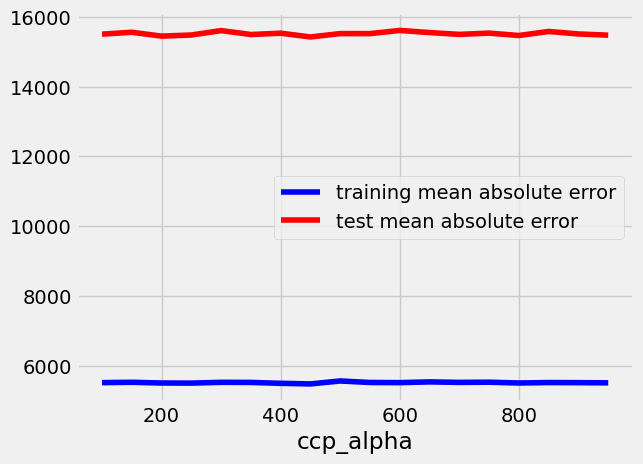

In [154]:
# Minimal Cost-Complexity Pruning
rf = ensemble.RandomForestRegressor(n_estimators = 475, oob_score=True, bootstrap = True)
tree_train = []
tree_test = []
param_range = range(100,1000,50)
for i in param_range:
    rf.set_params(ccp_alpha = i)
    error = get_error(X_train, y_train, X_test, y_test, rf, show=False)
    tree_train.append(error[2])
    tree_test.append(error[3])
plt.plot(param_range, tree_train, c = 'blue', label='training mean absolute error')
plt.plot(param_range, tree_test, c = 'red', label='test mean absolute error')
plt.legend(loc=7)
plt.xlabel('ccp_alpha')

# seems not to have much effect

Text(0.5, 0, 'ccp_alpha')

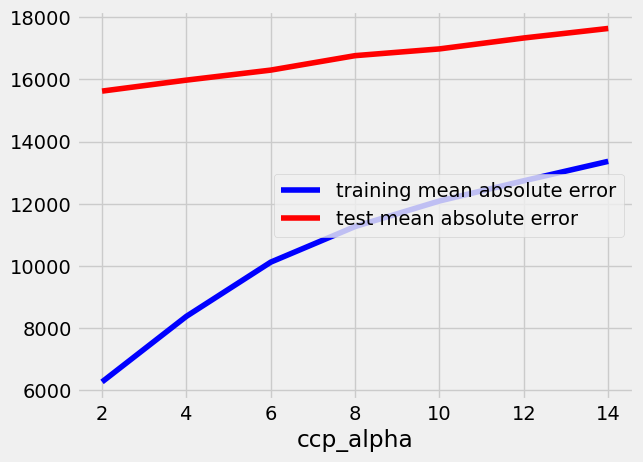

In [155]:
# Min Samples Leaf
rf = ensemble.RandomForestRegressor(n_estimators = 475, oob_score=True, bootstrap = True)
tree_train = []
tree_test = []
param_range = range(2,16,2)
for i in param_range:
    rf.set_params(min_samples_leaf = i)
    error = get_error(X_train, y_train, X_test, y_test, rf, show=False)
    tree_train.append(error[2])
    tree_test.append(error[3])
plt.plot(param_range, tree_train, c = 'blue', label='training mean absolute error')
plt.plot(param_range, tree_test, c = 'red', label='test mean absolute error')
plt.legend(loc=7)
plt.xlabel('min_samples_leaf')

# RANDOM FOREST HYPER-PARAMETER TUNING

-- random search is preferred for computational speed
-- we will use random search to narrow in on appropriate ranges 
-- then use grid search to fine tune within a smaller range

In [158]:
np.arange(0.05,0.8,0.05)

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75])

In [184]:
print('Parameters currently in use:\n')
print(rf.get_params())

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 600, num = 20)]

# Number of features to consider at every split
max_features = [int(x) for x in np.linspace(start = 20, stop = 60, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in range(2,15,1)]

# Maximum number of leaf nodes in the entire tree
max_leaf_nodes = np.arange(100, 300, 10)


# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in range(2,8,1)]

# Minimum number of samples required to split
min_samples_split = [int(x) for x in range(2,8,1)]

# MAX SAMPLES
max_samples = np.arange(0.05,0.8,0.05)





# set the parameter grid
random_grid = [{'n_estimators': n_estimators,
               'max_features': max_features,
               'max_samples': max_samples,
                'max_depth': max_depth
              },
              {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_samples': max_samples,
                'max_leaf_nodes': max_leaf_nodes
              },
              {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_samples': max_samples,
                'min_samples_leaf': min_samples_leaf
              },
              {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_samples': max_samples,
                'min_samples_split': min_samples_split
              }]
rf_random = ensemble.RandomForestRegressor(oob_score=True, bootstrap = True)


rf_random = RandomizedSearchCV(estimator = rf_random, param_distributions = random_grid, n_iter = 500, cv = 3, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)


Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 14, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 475, 'n_jobs': None, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': False}


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(oob_score=True),
                   n_iter=500, n_jobs=-1,
                   param_distributions=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                       10, 11, 12, 13, 14],
                                         'max_features': [20, 24, 28, 33, 37,
                                                          42, 46, 51, 55, 60],
                                         'max_samples': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75]),
                                         'n_estimators': [200, 221, 242, 263,
                                                          284, 305, 326, 347,
                                                          368,...
                                                          284, 305, 326, 347,
                                                          368, 389, 410, 431,
                                

In [168]:
rf_random.best_score_
rf_random.

nan

Model Performance
Average Test Error: 15175.0167 $USD
Test Accuracy = 91.26%
R-squared train = 0.97%
R-squared test = 0.91%
Improvement of 0.09%.
Best model params: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 46, 'max_leaf_nodes': 260, 'max_samples': 0.7000000000000001, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 557, 'n_jobs': None, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': False}
Variable: overall_qual         Importance: 0.2037
Variable: gr_liv_area          Importance: 0.1195
Variable: garage_cars          Importance: 0.0643
Variable: exter_qual           Importance: 0.0639
Variable: garage_area          Importance: 0.0571
Variable: 1st_flr_sf           Importance: 0.0532
Variable: total_bsmt_sf        Importance: 0.0524
Variable: house_age_at_sale    Importance: 0.0511
Variable: bsmt_qual            Importance: 0.03

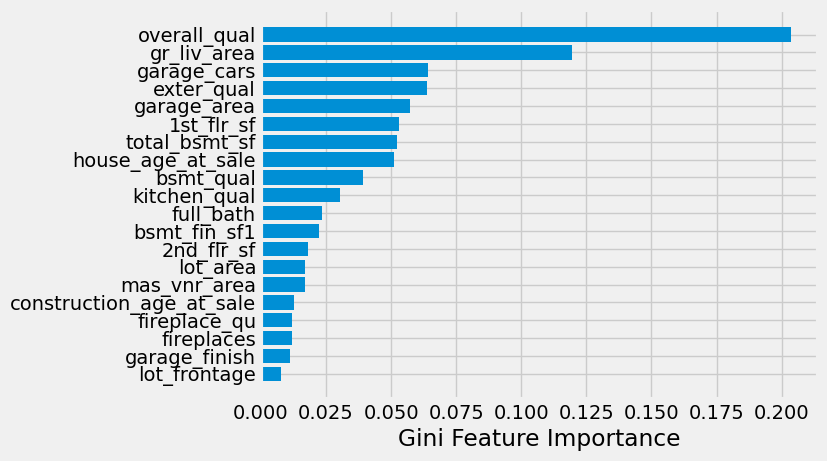

In [162]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test, X_train, y_train)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy[0] - eval_base[0]) / eval_base[0]))


print('Best model params:', best_random.get_params())

# Get numerical feature importances
importances = get_importance(best_random, X_test, y_test)



In [170]:
from sklearn.model_selection import GridSearchCV

print('Best Parameters from Random Search Cross Validation:\n')
best_random.get_params()

Best Parameters from Random Search Cross Validation:



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 46,
 'max_leaf_nodes': 260,
 'max_samples': 0.7000000000000001,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 557,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [173]:



# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 600, num = 10)]

# Number of features to consider at every split
max_features = [int(x) for x in np.linspace(start = 40, stop = 50, num = 1)]

# Maximum number of levels in tree
max_depth = [int(x) for x in range(8,11,1)]

# Maximum number of leaf nodes in the entire tree
max_leaf_nodes = np.arange(240, 280, 10)


# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in range(3,7,1)]



# MAX SAMPLES
max_samples = np.arange(0.50,0.85,0.05)





# set the parameter grid (Zeyu recommends tuning these together rather than in separate dicts)
grid = [{'n_estimators': n_estimators,
               'max_features': max_features,
               'max_samples': max_samples,
                'max_depth': max_depth
              },
              {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_samples': max_samples,
                'max_leaf_nodes': max_leaf_nodes
              },
              {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_samples': max_samples,
                'min_samples_leaf': min_samples_leaf
              }]
rf_grid = ensemble.RandomForestRegressor(oob_score=True, bootstrap = True)


grid_res = GridSearchCV(estimator = rf_grid, param_grid = grid, cv = 3, n_jobs = -1)
# Fit the random search model
grid_res.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(oob_score=True), n_jobs=-1,
             param_grid=[{'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                        15],
                          'max_features': [40],
                          'max_samples': array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 ]),
                          'n_estimators': [500, 511, 522, 533, 544, 555, 566,
                                           577, 588, 600]},
                         {'max_features': [40],
                          'max_leaf_nodes': array([240, 250, 260, 270]),
                          'max_samples': array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 ]),
                          'n_estimators': [500, 511, 522, 533, 544, 555, 566,
                                           577, 588, 600]},
                         {'max_features': [40],
                          'max_samples': array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 ]),
                          'mi

In [177]:
grid_res.best_score_

grid_res.best_params_



{'max_depth': 15,
 'max_features': 40,
 'max_samples': 0.8000000000000003,
 'n_estimators': 600}

In [189]:
# grid search results
best_grid = grid_res.best_estimator_
accuracy, r2_train, r2_test, error_percent_sale_price = evaluate(best_grid, X_test, y_test, X_train, y_train)
print('Improvement of {:0.2f}%.'.format( 100 * (accuracy - random_accuracy[0]) / random_accuracy[0]))


print('Best model params:', best_grid.get_params())

# Get numerical feature importances
importances = get_importance(best_grid, X_test, y_test)


The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 3_ssn_porch
- bldg_type_2fmcon
- bldg_type_twnhs
- exterior1st_asbshng
- exterior1st_asphshn
- ...
Feature names must be in the same order as they were in fit.



ValueError: X has 208 features, but RandomForestRegressor is expecting 131 features as input.

# FURTHER FEATURE ENGINEERING AND FEATURE REDUCTION

In [187]:
features.head()

,gr_liv_area,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmt_fin_type1,bsmt_fin_sf1,bsmt_fin_type2,bsmt_fin_sf2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abv_gr,kitchen_abv_gr,kitchen_qual,tot_rms_abv_grd,functional,fireplaces,fireplace_qu,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3_ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,street_grvl,alley_grvl,alley_pave,land_contour_bnk,land_contour_hls,land_contour_low,lot_config_corner,lot_config_culdsac,lot_config_fr2,lot_config_fr3,neighborhood_blmngtn,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_grnhill,neighborhood_idotrr,neighborhood_landmrk,neighborhood_meadowv,neighborhood_mitchel,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker,near_rr,near_main_rd,near_pos,bldg_type_2fmcon,bldg_type_duplex,bldg_type_twnhs,bldg_type_twnhse,house_style_1.5fin,house_style_1.5unf,house_style_2.5fin,house_style_2.5unf,house_style_2story,house_style_sfoyer,house_style_slvl,roof_style_flat,roof_style_gambrel,roof_style_hip,roof_style_mansard,roof_style_shed,roof_matl_membran,roof_matl_metal,roof_matl_roll,roof_matl_tar&grv,roof_matl_wdshake,roof_matl_wdshngl,exterior1st_asbshng,exterior1st_asphshn,exterior1st_brkcomm,exterior1st_brkface,exterior1st_cblock,exterior1st_cemntbd,exterior1st_hdboard,exterior1st_imstucc,exterior1st_metalsd,exterior1st_plywood,exterior1st_precast,exterior1st_stucco,exterior1st_wd sdng,exterior1st_wdshing,exterior2nd_asbshng,exterior2nd_asphshn,exterior2nd_brk cmn,exterior2nd_brkface,exterior2nd_cblock,exterior2nd_cmentbd,exterior2nd_hdboard,exterior2nd_imstucc,exterior2nd_metalsd,exterior2nd_plywood,exterior2nd_precast,exterior2nd_stone,exterior2nd_stucco,exterior2nd_wd sdng,exterior2nd_wd shng,mas_vnr_type_brkcmn,mas_vnr_type_brkface,mas_vnr_type_stone,foundation_brktil,foundation_pconc,foundation_slab,foundation_stone,foundation_wood,heating_floor,heating_gasw,heating_grav,heating_othw,heating_wall,garage_type_2types,garage_type_basment,garage_type_builtin,garage_type_carport,garage_type_detchd,garage_type_na,misc_feature_gar2,misc_feature_othr,misc_feature_shed,misc_feature_tenc,sale_type_cod,sale_type_cwd,sale_type_con,sale_type_conld,sale_type_conli,sale_type_conlw,sale_type_new,sale_type_oth,sale_type_vwd,sale_condition_abnorml,sale_condition_adjland,sale_condition_alloca,sale_condition_family,sale_condition_partial,ms_sub_class_120,ms_sub_class_150,ms_sub_class_160,ms_sub_class_180,ms_sub_class_190,ms_sub_class_30,ms_sub_class_40,ms_sub_class_45,ms_sub_class_50,ms_sub_class_60,ms_sub_class_70,ms_sub_class_75,ms_sub_class_80,ms_sub_class_85,ms_sub_class_90,ms_zoning_a (agr),ms_zoning_c (all),ms_zoning_fv,ms_zoning_i (all),ms_zoning_rh,ms_zoning_rm,house_age_at_sale,construction_age_at_sale,yr_sold_2007,yr_sold_2008,yr_sold_2009,yr_sold_2010
0,856,80.0,7890,4,2,3,6,6,0.0,3,3,3,3,1,3,238.0,1,0.0,618.0,856.0,3,1,4,856,0,0,1.0,0.0,1,0,2,1,3,4,7,1,4,1,2.0,399.0,3,3,3,0,0,0,0,166,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71,60,0,0,0,1
1,1049,42.0,4235,4,2,3,5,5,149.0,4,3,4,3,2,6,552.0,5,393.0,104.0,1049.0,3,1,4,1049,0,0,1.0,0.0,2,0,2,1,4,5,7,0,0,3,1.0,266.0,3,

In [192]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [194]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif_info['Column'] = features.columns
vif_info.sort_values('VIF', ascending=False).head(50)

divide by zero encountered in double_scalars


,VIF,Column
0,inf,gr_liv_area
15,inf,bsmt_fin_sf1
125,inf,exterior1st_precast
139,inf,exterior2nd_precast
195,inf,ms_sub_class_90
25,inf,low_qual_fin_sf
24,inf,2nd_flr_sf
23,inf,1st_flr_sf
19,inf,total_bsmt_sf
18,inf,bsmt_unf_sf


In [190]:
# Total Square Footage TRAINING
X_train['total_sf'] = X_train.total_bsmt_sf + X_train.gr_liv_area
X_train['total_floor_sf'] = X_train['1st_flr_sf'] + X_train['2nd_flr_sf']
X_train['total_porch_sf'] = X_train.open_porch_sf + X_train.enclosed_porch + X_train['3_ssn_porch'] + X_train.screen_porch

# Total Bathrooms TRAINING
X_train['total_bathrooms'] = X_train.full_bath + .5 * X_train.HalfBath + X_train.bsmt_full_bath + .5 * X_train.bsmt_half_bath

In [180]:
# FEATURE REDUCTION
# USE THIS REFERENCE: https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f 
features_to_remove = [pair[0] for pair in feat_imp_base if pair[1] < 0.0001]

# Remove 
X_train_reduced = X_train.drop(features_to_remove, axis = 1)
X_test_reduced = X_test.drop(features_to_remove, axis = 1)



# Fit simple default value model
# Train the model on training data
best_grid.fit(X_train_reduced, y_train);


Model Performance
Average Test Error: 14910.9326 $USD
Test Accuracy = 91.44%
R-squared train = 0.98%
R-squared test = 0.91%
Accuracy Improvement of 0.29%
Train R-Squared Improvement of -0.65%
Test R-Squared Improvement of 0.74%
Variable: land_slope           Importance: 0.2364
Variable: gr_liv_area          Importance: 0.1238
Variable: mas_vnr_area         Importance: 0.0832
Variable: garage_finish        Importance: 0.0674
Variable: bsmt_unf_sf          Importance: 0.0564
Variable: exterior1st_precast  Importance: 0.0536
Variable: electrical           Importance: 0.0516
Variable: garage_cars          Importance: 0.0413
Variable: exter_cond           Importance: 0.0315
Variable: kitchen_abv_gr       Importance: 0.0247
Variable: bsmt_half_bath       Importance: 0.0196
Variable: bsmt_fin_type1       Importance: 0.0187
Variable: 1st_flr_sf           Importance: 0.0179
Variable: lot_area             Importance: 0.0173
Variable: overall_cond         Importance: 0.015
Variable: functional   

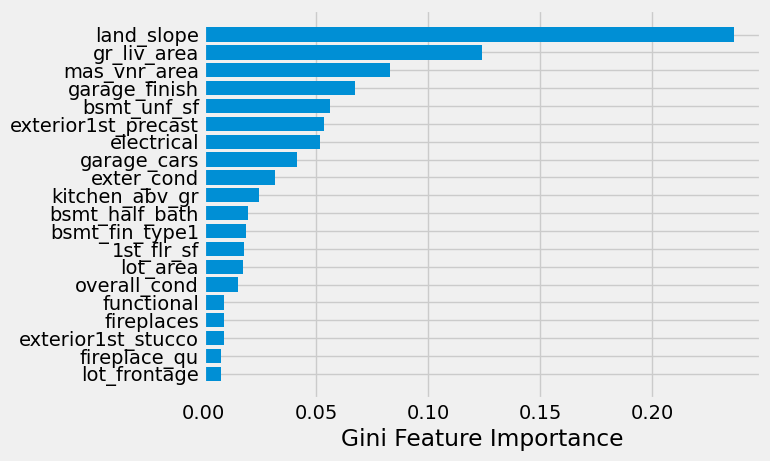

In [183]:
# EVALUATION
reduced_model_accuracy = evaluate(best_grid, X_test_reduced, y_test, X_train_reduced, y_train)


print('Accuracy Improvement of {:0.2f}%'.format(100 * (reduced_model_accuracy[0] - eval_base[0]) / eval_base[0]))
print('Train R-Squared Improvement of {:0.2f}%'.format(100 * (reduced_model_accuracy[1] - eval_base[1]) / eval_base[1]))

print('Test R-Squared Improvement of {:0.2f}%'.format(100 * (reduced_model_accuracy[2] - eval_base[2]) / eval_base[2]))

# Get feature importance
reduced_importance = get_importance(best_grid, X_test_reduced, y_test)